# Computational Finance

We want to (1) compute the value of an option, (2) define hedging strategies that replicate this option, and (3) calibrate a parametric model with observed option prices. 

Consider a market containing two primary assets: a risk-free bond with price $B_t=e^{rt}$, a stock $S_t$
of geometric Brownian motion type $S(t)$ = $S(0) exp(\mu t + \sigma W(t))$, with parameters $\mu \in \mathbb{R}, \sigma > 0 $ and standard Brownian motion $W$.

A derivative or option is an asset whose payoff depends on the underlying. The payoff $X$ at time $T$ may be a function $f(S(T))$ of the underlying at time $T$ as e.g. $X = (S(T)-K)^{+}$ for a simple European call or it could be a more complex function of the whole past of $S$. In complete markets such options can be replicated perfectly. This means that there exists a self-financing portfolio $\phi = (\phi_0,\phi_1)$ whose value at time $T$ equals $V_\phi(T) = X$. Absence of arbitrage implies that $V_\phi(t)$ is the only reasonable option price of the option at time $t$. It can be computed as conditional expectation


$V_\phi(t) = B(t)\mathbb{E}^\mathbb{Q}\big[X/B(T) \big| \mathcal{F}_t\big]$ 


of the discounted payoff under the unique equivalent martingale measure $\mathbb{Q}$, i.e. the unique
probability measure $\mathbb{Q} \sim \mathbb{P}$ such that $S/B$ is a $\mathbb{Q}$-martingale.

American options are specified by an entire exercise process $X = (X(t))_{t\in[0,T]}$ as e.g. $X(t) = (K-S(t))^{+}$ for an American put. In the complete case, the only reasonable price is the B-fold of the Snell envelope of $X/B$ relative to $\mathbb{Q}$. The $\mathbb{Q}$-Snell envelope is the smallest $\mathbb{Q}$-supermartingale dominating $X/B$. Again, $\mathbb{Q}$ denotes the unique equivalent martingale measure from above. One can write this fair price also as


$V(t) =  \sup_{\tau} \mathbb{E}^\mathbb{Q}\big[X(\tau)/B(\tau) \big| \mathcal{F}_t\big]$ 


where the supremum extends over all stopping times stopping between t and T. One such stopping time is the first time $t$ such that $V (t) = X(t)$, i.e. the market price of the option equals the exercise price.



- A Martingale is a sequence of random variables (i.e., a stochastic process) for which, at a particular time in the realized sequence, the expectation of the next value in the sequence is equal to the present observed value even given knowledge of all prior observed values. Supermartingale: $\mathbb{E}$ equal or less than current value.
- The Snell envelope is the smallest supermartingale dominating a stochastic process. 
- Supremum: the smallest quantity that is greater than or equal to each of a given set or subset of quantities.
- $\mathcal{F}_t$ is the sigma-field at time $t$, i.e. all the available information at time $t $

## Binomial Trees 



In the Cox-Ross-Rubinstein model (CRR) we consider equidistant times $0 = t_0,t_1,...,t_M = T$ with $t_i = i\Delta t$ and hence $\Delta t = T/M.$ The bond moves according to $B(t_i) = e^{rt_i}$ .
The stock goes up by a factor $u$ resp. down by a factor $d$ in each period, i.e.,

$
 S(t_i) = 
  \begin{cases}
   S(t_{i-1})u&\text{with probability } p \\
   S(t_{i-1})d&\text{with probability } p-1
  \end{cases}
$


, where $d < e^{r\Delta t} < u$. More precisely, $p$ and $1-p$ denote the conditional probabilities of going up and down, repectively, given the past. Option prices in a properly chosen sequence of CRR models converge to the corresponding Black-Scholes notions if the number of time step tends to infinity.

For option pricing real-world transition probabilities do not matter. Instead we need to consider martingale probabilities, i.e. probabilities such that

$\mathbb{E}^\mathbb{Q}\big[S(t_i)/B(t_i)\big| \mathcal{F}_{t_{i-1}}\big] = S(t_{i-1})/B(t_{i-1})$ .


If we denote the $Q$-transition probabilities by $q$ and $1-q$, respectively, the left-hand side equals
$q \frac{S(t_{i-1})u}{B(t_{i-1})e^{r\Delta t}} + (1-q) \frac{ S(t_{i-1})d}{B(t_{i-1})e^{r\Delta t}} $ which equals the right-hand side iff

$ \frac{qu+(1-q)d}{e^{r\Delta t}} = 1 $

 or

$ q = \frac{e^{r\Delta t}-d}{u-d}$



As previously mentioned a properly parameterized CRR model approximates BS as $M$ gets large. If we match the first two moments of the CRR and BS model we obtain

$\begin{align}
u = \beta + \sqrt{\beta^2 - 1 }\\
d = \beta - \sqrt{\beta^2 - 1 }\\
q = \frac{\exp(r\Delta t ) - d}{u-d}\\
\beta = \frac{1}{2}( \exp{(-r \Delta t )} + \exp{((r +\sigma^2) \Delta t)}) \\
\end{align}$

### European Options 
Consider a European option with payoff $g(S(T))$ for some function $g$ as e.g. $g(x) = (x-K)^{+}$ (call) or $g(x) = (K-x)^{+}$ (put). We denote the fair price of the option at time $t_i$ by $V(S(t_i), t_i)$. The $Q$-martingale property for discounted option prices reads as


$\mathbb{E}^\mathbb{Q}\big[V (S(t_i), t_i)/B(t_i)\big| \mathcal{F}_{t_{i-1}}\big] = V (S(t_{i-1}), t_{i-1})/B(t_{i-1})$ 

or 

$q \frac{ V(S(t_{i-1})u,t_i)}{B(t_{i-1})e^{r\Delta t}} + (1-q)\frac{ V(S(t_{i-1})d,t_i)}{B(t_{i-1})e^{r\Delta t}}  = \frac{ V(S(t_{i-1}),t_i)}{B(t_{i-1})}$

or

$V (S(t_{i-1}), t_{i-1}) = e^{-r\Delta t} (qV(S(t_{i-1})u, t_i) + (1-q)V(S(t_{i-1})d, t_i))$

We can compute option prices starting from $V (S(T ), T ) = g(S(T ))$ and moving backwards in time.

Since the model is complete, the payoff $g(S(T))$ can be replicated perfectly by a self-
financing portfolio $\phi = (\phi_0, \phi_1)$. Its value equals $\phi_0(t_i)B(t_i) + \phi_1(t_i)S(t_i) = V (S(t_i), t_i)$.

Due to self-financeability

$\phi_0(t_{i-1})B(t_{i-1}) + \phi_1(t_{i-1})S(t_{i-1}) = \phi_0(t_i)B(t_{i-1}) + \phi_1(t_i)S(t_{i-1})$

lead to 

$\phi_0(t_i)B(t_{i-1}) + \phi_1(t_i)S(t_{i-1}) = V (S(t_{i-1}), t_{i-1})$


$\phi_0(t_i)B(t_{i-1}) + \phi_1(t_i)S(t_{i-1}u) = V (S(t_{i-1}u), t_{i-1})$


$\phi_0(t_i)B(t_{i-1}) + \phi_1(t_i)S(t_{i-1}d) = V (S(t_{i-1}d), t_{i-1})$

Hence,

$\phi_1(t_i) = \frac{V (S(t_{i-1})u, t_i) - V (S(t_{i-1})d, t_i)}{ S(t_{i-1})(u-d)}$

$\phi_0(t_i) = \frac{V (S(t_{i-1}),t_{i-1})- \phi_1(t_i)S(t_{i-1})}{B(t_{i-1})}$

### American Options 
American options have exercise price $g(S(t_i))$ at time $t_i$.

$V(S(t_{i-1}), t_{i-1}) = \max{ \{g(S(t_{i-1})),\mathbb{E}^\mathbb{Q}\big[V (S(t_i), t_i)/B(t_i)\big| \mathcal{F}_{t_{i-1}}\big]\}}$ 

This leads to 

$V (S(t_{i-1}), t_{i-1}) = \max{ \{g(S(t_{i-1})),e^{-r\Delta t} (qV(S(t_{i-1})u, t_i) + (1-q)V(S(t_{i-1})d, t_i))\}}$

The first optimal stopping time is

$\tau_f = \inf{\{t_i : V (S(t_i), t_i) = g(S(t_i))\}}$

and the last optimal stopping time is

$\tau_s = \inf{ \{t_i : i = M \text{  or  } g(S(t_i)) > e^{-r\Delta t} (qV (S(t_i)u, t_{i+1}) + (1-q)V (S(t_i)d, t_{i+1}))\}}$

In [7]:
import numpy as np

def crr_bs_approx(S_0,r,sigma,T,M,K,EU,Type):
    
    dt=T/M
    #Set u,d,q such that first and second moments match BS
    beta = 0.5*(np.exp(-r*dt)+np.exp((r+(sigma**2))*dt))
    u = beta + ((beta**2)-1)**0.5
    d = 1/u#beta - ((beta**2)-1)**0.5
    q = (np.exp(r*dt)-d)/(u-d)

    if Type == 'call':
        def g(St,K):
            return max(St - K, 0)
    elif Type == 'put':
        def g(St,K):
            return max(K - St, 0)
    else:
        raise Exception("Specify valid Type ('put'/'call')") 

    g = np.vectorize(g ,otypes=[np.float])        

    S = np.zeros((M+1,M+1))
    S[0,0] = S_0
    V = np.zeros((M+1,M+1))
    for i in range(1,M+1):
        for j in range(i+1):
            S[j,i] = S_0*(u**j)*(d**(i-j))

    V[:,-1] = g(S[:,-1],K)

    if EU == 1:
        for i in range(M-1,-1,-1):
            for j in range(i+1):
                V[j,i] = np.exp(-r*dt)*( q*V[j+1,i+1] + (1-q)*V[j,i+1])
    elif EU == 0:
        for i in range(M-1,-1,-1):
            for j in range(i+1):
                V[j,i] = max(g(S[j,i],K) ,np.exp(-r*dt)*( q*V[j+1,i+1] + (1-q)*V[j,i+1]))
    else:
        raise Exception("Specify valid EU state (0/1)") 
    
    
    return V[0,0]



sigma=0.3
r=0.03
S_0=100
T=1
M=2000
K=100
EU=1
Type = 'call'

V = crr_bs_approx(S_0,r,sigma,T,M,K,EU,Type)
print(f"Fair value of option: {round(V,3)}")

Fair value of option: 13.282


To check whether the approximation is any good compute BS call and compare:

In [8]:
from scipy.stats import norm
import numpy as np

def eu_call_bs(S_t,r,sigma,T,K,t):
    d_1 = (np.log(S_t/K)+(r+sigma**2/2)*(T-t))/(sigma*(T-t)**0.5)
    d_2 = d_1 - sigma*(T-t)**0.5
    phi_1 = norm.cdf(d_1)
    cdf_d2 = norm.cdf(d_2)
    c = S_t * phi_1 - K*np.exp(-r*(T-t)) *cdf_d2
    phi_0 = -K*np.exp(-r*T)*cdf_d2
    # def eu_call_bs(S_0,r,sigma,T,K,t):
    # c = S_0
    return c, phi_0, phi_1

sigma=0.3
r=0.03
S_t=100
T=1
K=100 
t = 0

c, phi_0, phi_1 = eu_call_bs(S_t,r,sigma,T,K,t)
print(f"The fair value of the option is {round(c,3)}, the hedging position in the the stock is {round(phi_1,3)}, \
the hedging position in the the bond is {round(phi_0,3)}")    

The fair value of the option is 13.283, the hedging position in the the stock is 0.599, the hedging position in the the bond is -46.587


## Monte Carlo
Once we are considering very complicated payoff structures many numerical methods relying on e.g. solving PDE’s or using integral transforms are not available anymore. In this case we can employ Monte Carlo methods, basically simulating many possible futures and taking the sample moments as an approximation of the real world population moments. 
For this we need a random number generator that can sample from the appropriate probability distribution. The needed law might not be implemented in the software package so we may need to implement a random number generator that takes only uniformly distributed random numbers as input. This can be done via 
- Inversion
- Acceptance/rejection method 

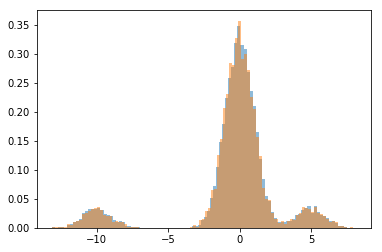

In [10]:
import numpy as np
import scipy.interpolate as interpolate
from matplotlib import pyplot as plt 

def inverse_transform_sampling(data, n_bins=100, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

st_normal = np.random.normal(0,1,10000)
mm_normal = np.append(st_normal, (np.random.normal(5,1,1000), np.random.normal(-10,1,1000)))
c = inverse_transform_sampling(mm_normal,n_bins=100, n_samples=10000)
plt.hist(mm_normal, alpha=0.5, bins=100, normed=True);
plt.hist(c, alpha=0.5, bins=100, normed=True);
plt.show();

In [26]:
import numpy as np

def mc_eu(S_0,K,r,sigma,T,N,g):
    def f(x):
        return np.exp(-r*T)*g(S_0*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
                              
    X = np.random.normal(0,1,N)
    Y = f(X)
    v_0 = np.mean(Y)
    epsilon = 1.96 * np.sqrt(np.var(Y)/M)
    return v_0, epsilon
                  
sigma=0.3
r=0.03
S_0=100
T=1
N=10000
K=100
g = lambda S_0, K: np.maximum((S_0 - K),0)

V,e = mc_eu(S_0,K,r,sigma,T,N,g)
print(f"Fair value of option: {round(V,3)}, 95% confidence interval: [ {round(V - e,3)} , {round(V+e,3)} ]")

Fair value of option: 13.203, 95% confidence interval: [ 12.252 , 14.154 ]


### Variance reduction

The Monte Carlo estimator converges at the rate $\frac{1}{\sqrt{ N }}$ since its standard deviation is $\sigma(\hat{V_N}) = \frac{\sigma(f(X))}{\sqrt{N}}$. Since we don't have unlimited compute power this rate of convergence might be to slow for our purposes. We may can do better by trying to reduce $\sigma(f(X))$ through some tricks, e.g., by means of antithetic variables or control variates. Another problem arises if there are outcomes with very low probability that have a large effect on the option value, i.e., Black Swans. In this case, we may not get any samples from the part of the distribution that matter most and our estimate will be way off. To correct for that use importance sampling. This can be useful e.g. in pricing deep out of the money puts:  

In [25]:
from scipy.stats import norm
import numpy as np


def mc_eu_is(S_0,K,r,sigma,T,N,g,mu):
    def f(x):
        return np.exp(-r*T-x*mu+0.5*mu**2)*g(S_0*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
                              
    X = np.random.normal(mu,1,N)
    Y = f(X)
    v_0 = np.mean(Y)
    epsilon = 1.96 * np.sqrt(np.var(Y)/M)
    return v_0, epsilon



def eu_put_bs(S_t,r,sigma,T,K,t):
    d_1 = (np.log(S_t/K)+(r+sigma**2/2)*(T-t))/(sigma*(T-t)**0.5)
    d_2 = d_1 - sigma*(T-t)**0.5

    p =  K*np.exp(-r*(T-t)) *norm.cdf(-d_2) -  S_t *norm.cdf(-d_1)
    
    return p




sigma=0.3
r=0.03
S_0=S_t=200
T=1
N=10000
K=100
g = lambda S_0, K: np.maximum((K-S_0),0)
t = 0
mu = ( np.log(K/S_0) - (r-1/2*sigma**2)*T ) / ( sigma*np.sqrt(T) )

V,e = mc_eu_is(S_0,K,r,sigma,T,N,g,mu)
print(f"Fair value of OOM put with importance sampling: {round(V,3)},\
95% confidence interval: [ {round(V - e,3)} , {round(V+e,3)} ]")


V,e = mc_eu(S_0,K,r,sigma,T,N,g)
print(f"Fair value of OOM put standard MC : {round(V,3)}, 95% confidence \
interval: [ {round(V - e,3)} , {round(V+e,3)} ]")


V = eu_put_bs(S_t,r,sigma,T,K,t)
print(f"Fair value of OOM put BS: {round(V,3)}")


Fair value of OOM put with importance sampling: 0.108,95% confidence interval: [ 0.102 , 0.113 ]
Fair value of OOM put standard MC : 0.113, 95% confidence interval: [ 0.052 , 0.175 ]
Fair value of OOM put BS: 0.109


As can be seen above, the importance sampling technique estimates a much tighter confidence interval for the OOM put. 

### Finite difference method
In addition to the fair value of the option we need to know how to hedge it. Hedging strategies often involve the derivative of the option with respect to variables such as the stock price. The finite difference approach gives us an approximation of the derivative. This works by simply nudging the variable $+h/2$ and $-h/2$ and observing how the function changes relative to $h$. More formally, for a sufficiently smooth function $z$ we have the Taylor expansion

$$ z( \theta + h/2) = z(\theta) + z' (\theta) h/2 + z'' (\theta) h^2/8  + z''' (\theta) h^3/48 + O(h^4)$$

and 

$$ z( \theta - h/2) = z(\theta) - z' (\theta) h/2 + z'' (\theta) h^2/8  - z''' (\theta) h^3/48 + O(h^4)$$

where $O(h^4)$ stands for an expression such that $O(h^4)/h^4$  is bounded in a neighbourhood of
$h = 0$.

This yields 

$$z'(\theta) = \frac{z(\theta+h/2)-z(\theta-h/2)}{h} + O(h^2)$$ 

$$ = \mathbb{E}\big[\frac{Z(\theta+h/2)-Z(\theta-h/2)}{h} \big] + O(h^2)$$ 

The quantities $\mathbb{E}\big[ Z(\theta + h/2)\big]$ and $\mathbb{E}\big[ Z(\theta - h/2)\big]$ can be computed by Monte Carlo simulation as usual. Choosing a small $h$ reduces the bias due to the $O(h^2)$ term.

In [39]:
import numpy as np

def mc_eu(S_0,K,r,sigma,T,N,g):
        
    x = np.random.normal(0,1,N)
    a = np.exp(-r*T)*g((S_0+h/2)*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
    b = np.exp(-r*T)*g((S_0-h/2)*np.exp( (r-0.5*sigma**2)*T + (sigma*T**0.5*x) ), K) 
    Y = (a-b)/h
    v_prime = np.mean(Y)
    
    return v_prime
                  
sigma=0.3
r=0.03
S_0=100
T=1
N=100000
K=100
g = lambda S_0, K: np.maximum((S_0 - K),0)
h = 1

v_prime = mc_eu(S_0,K,r,sigma,T,N,g)
print(f"The hedging position in the stock is {round(v_prime,3)}.")

The hedging position in the stock is 0.596.


## Simulation of stochastic integrals
In some applications we need to simulate the whole path $(X (t))_{t\in[0,T ]}$ of a stochastic process rather than just its terminal value $X(T)$. This happens e.g. if we want to compute prices of path-dependent claims as e.g. lookback, barrier, or Asian options. But even if we are interested only in$ X (T )$, it may be necessary to simulate the past as well because we do not know the law of $ X(T)$ in closed form.
In this section we focus on diffusion-type processes, i.e., solution to stochastic differential equations of the form
$$dX (t) = a(X (t), t)dt + b(X (t), t)dW (t)$$

with some Wiener process $W$, some starting value $X(0)$, and given deterministic functions $a$, $b$. It is obviously impossible to simulate infinitely many numbers on a real computer. The goal is therefore to generate random paths of $X$ on some equidistant time grid $0 = t_0 < t_1 < ··· < t_m = T$ with $t_i = i\Delta t$ and $\Delta t = T/m$, i.e., 
$X(t_0),...,X(t_m)$.

### Euler method
If $a$ and $b$ are sufficiently smooth and the grid is sufficiently dense 
$$X(t_i) ≈ X(t_{i-1})+ \int_{t_{i-1}}^{t_i} a(X(t_{i-1}),t_{i-1})dt + \int_{t_{i-1}}^{t_i} b(X(t_{i-1}),t_{i-1})dW(t)$$

$$= X(t_{i-1}) + a(X(t_{i-1}), t_{i-1})\Delta t + b(X(t_{i-1}), t_{i-1})\Delta W_i$$

with $W_i = W_{t_{i}} - W_{t_{i-1}}$
is a good approximation for 

$$X(t_i) = X(t_{i-1})+ \int_{t_{i-1}}^{t_i} a(X(t),t)dt + \int_{t_{i-1}}^{t_i} b(X(t),t)dW(t)$$

Let's simulate geometric Brownian motion where $a(X(t),t) = \mu * X(t) $ and $b(X(t),t) = \sigma * X(t) $ 

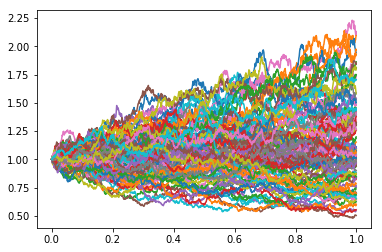

The mean stock price at time T is 1.1415831194765613


In [21]:
import numpy as np 
from matplotlib import pyplot as plt 

def geom_brownian_motion(m,T,a,b,X_0):
    dt = T/m
    r = np.random.normal(0,1,m)
    dW = r * np.sqrt(dt)
    X = np.zeros(m)
    t = np.zeros(m)
    t[0] = 0

    X[0] = X_0
    for i in range(1,m):
        t[i] = t[i-1]+dt
        X[i] = X[i-1] + a(X[i-1],t[i-1])*dt + b(X[i-1],t[i-1])*dW[i]
    return X, t


m=1000
T=1
mu = 0.1
sigma = 0.3
a = lambda X, t: mu*X
b = lambda X, t:sigma*X
X_0 = 1  

# Let's simulate n alternative future histories.
n = 100
X = np.zeros((n,m))
for i in range(n):
    X[i],t = geom_brownian_motion(m,T,a,b,X_0)
    plt.plot(t,X[i])

plt.show()

X_mean  = np.mean(X[:,-1])
print(f"The mean stock price at time T is {X_mean}")

And let us show by simulation that this is equivalent to $X(t) = X(0) \exp((\mu − \sigma^2/2)t + \sigma W (t))$ with $t = T$ .

In [20]:
X = np.zeros(n)
r = np.random.normal(0,1,m)

X = X_0 *np.exp((mu-sigma**2/2)*T + sigma*r*T**0.5)
X_mean  = np.mean(X)
print(f"The mean stock price at time T is {X_mean}")

The mean stock price at time T is 1.0990055576996491
